### <font color="red">DESIGN ANALYSIS - COUPLED VIBRATION<font> 

This is an open-research conducted on Design analysis, which is key features and core study in Mechnical engineering. All material used during research are free of cost and open-source softwares, such as Jupyter Notebook, Pandas, Numpy, Math Python in-built libraries and Previous publish journals (most of them are professional industrial or univeristy websites)

#### Hemant Thapa

Linkedin: https://www.linkedin.com/in/thapahemant/

Email: hemantthapa1998@gmail.com

------------------------------------------------------------------------------------------------------

#### 1. Importing Libraries

In [3]:
import numpy as np
import math 
import pandas as pd

------------------------------------------------------------------------------------------------------

The Figure shows a schematic diagram of a motor vechile. The mass of the vehicle
is 1250 kg and its moment of inertia about its axis through its centre of mass G perpendicular to the section is 2000kgm^2. The equivalent stiffness of the tyres and springs of the front suspension is 40kN/m and that of the rear suspension is 60kN/m.

The C of G of the engine is 0.2m from the front suspension as shown, and when the engine idles at 500 rev/min. it produces an unbalanced vertical perodic force of the form 100.cos(wt) newtons, where 'w' is the engine speed in rad/sec. Determine the amplitude of the vibrations of the front and rear of the vehicle.

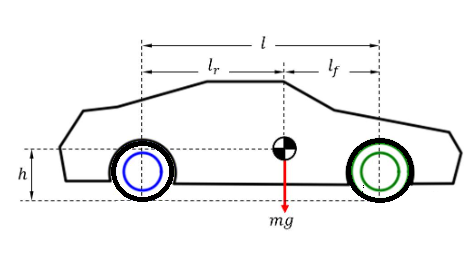

------------------------------------------------------------------------------------------------------

#### 2. Given: 

1. Mass: 1250 Kg
2. Distance between front axle and C.G. (a): 1m
3. Distance between rear axle and C.G. (b): 1.5m
4. Front spring stifness (k1 or kf): 40000 N/m
5. Rear Spring stifness (k2 or kr): 60000 N/m
6. Moment of Interia (M): 2000 Kgm^2
7. Engine Revolution per min: 500 rev/min
8. Center of gravity of engine from front suspension (ce): 0.2m

#### <font color="red">INPUT :<font>

In [1]:
print("INPUT:")
mass = float(input("\nMass of the system (Kgm^2)"))
a = float(input("a - Distance from centre of mass, G to front (m): "))
b = float(input("b - Distance from centre of mass, G to rear (m): "))
ce = float(input("ce - Center of gravity of the engine (m): "))
k1 = float(input("k1 - Stiffness of the front suspension (kN/m): "))
k2 = float(input("k2 - Stiffness of the rear suspension (kN/m): "))
I = float(input("I - Moment of Intertia (Kgm^2): "))
N = float(input("N - Number of revolution per min: "))

INPUT:

Mass of the system (Kgm^2)1250
a - Distance from centre of mass, G to front (m): 1
b - Distance from centre of mass, G to rear (m): 1.5
ce - Center of gravity of the engine (m): 0.2
k1 - Stiffness of the front suspension (kN/m): 40000
k2 - Stiffness of the rear suspension (kN/m): 60000
I - Moment of Intertia (Kgm^2): 2000
N - Number of revolution per min: 500


------------------------------------------------------------------------------------------------------

####  3. Angular frequency

In [4]:
w = (2*math.pi*N)/60 #60sec, pi = 22/7
print(f"\nAngular frequency (W): {round(w,4)} rad/sec")


Angular frequency (W): 52.3599 rad/sec


------------------------------------------------------------------------------------------------------

#### 4. Peak periodic force (Amplitude)

In [5]:
#peak value of periodic force = 100 cos(wt) N
p = 100
print(f"Perodic force (P): {p} N")

Perodic force (P): 100 N


------------------------------------------------------------------------------------------------------

#### 5. Torque about center of gravity 

In [6]:
t = 100*(a-ce)
print(f"Torque (T): {t} Nm")

Torque (T): 80.0 Nm


------------------------------------------------------------------------------------------------------

#### 6. Solving A, C, E

In [7]:
A = k1+k2-mass*(w**2)
C = k1*a-k2*b
E = (k1*a**2)+(k2*b**2)-(I*w**2)
print(f"A: {round(A,2)}",f"C: {C}",f"E: {round(E,2)}" )

A: -3326945.97 C: -50000.0 E: -5308113.56


In [8]:
def equation(k1, k2, mass, w, a, b, I):
    A = k1+k2-mass*(w**2)
    C = k1*a-k2*b
    E = (k1*a**2)+(k2*b**2)-(I*w**2)
    return A, C, E
equation(k1, k2, mass, w, a, b, I)

(-3326945.9726004708, -50000.0, -5308113.556160754)

In [9]:
print(f"A: {round(A,2)}",f"C: {C}",f"E: {round(E,2)}" )

A: -3326945.97 C: -50000.0 E: -5308113.56


In [10]:
dic_ACE = {"A":A, "C":C, "E":E}
df_ACE = pd.DataFrame([dic_ACE])
df_ACE

,A,C,E
0,-3.326946e+06,-50000.0,-5.308114e+06


#### <font color="red">OUTPUT :<font>

In [11]:
print(f"\nAngular frequency (W): {round(w,4)} rad/sec")
print(f"Perodic force (P): {p} N")
print(f"Torque (T): {t} Nm")
print(f"A: {round(A,2)}")
print(f"C: {C}")
print(f"E: {round(E,2)}")


Angular frequency (W): 52.3599 rad/sec
Perodic force (P): 100 N
Torque (T): 80.0 Nm
A: -3326945.97
C: -50000.0
E: -5308113.56


------------------------------------------------------------------------------------------------------

#### 7. The linear algebra that illustrates a system of equations. Consider AX=B, where we need to solve for X

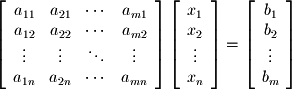

The dynamic matrix equation ignoring damping effect is written as

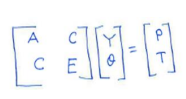

[alpha][X] = [beta] 

In [12]:
alpha = np.array([[A, C],[C,E]])
beta = np.array([p, t])
X = np.linalg.solve(alpha, beta)
L = list(X)
L[0], L[1]
Y = L[0] 
Theta = L[1]
print(f"Value of Y: {Y} m")
print(f"value of Theta:{Theta} radian")

Value of Y: -2.9835317191106952e-05 m
value of Theta:-1.4790232595782672e-05 radian


In [13]:
dic_solved_x = {"Y (m)":Y, "Theta (radians)":Theta}
df_solved_x = pd.DataFrame([dic])
df_solved_x

NameError: name 'dic' is not defined

------------------------------------------------------------------------------------------------------

#### 8. Amplitudes

The amplitude of the vertical vibrations at the front and rear end of vehicle 

In [14]:
yf = Y + a*(Theta) #Amplitude of the vertical vibration at the front end
yr = Y - b*(Theta) #Amplitude of the vertical vibration at the rear end

In [15]:
print("\nvalue substituting on above equation for vertical vibration")
print(f"Y:{Y} m, a:{a} m, b:{b} m, Theta:{Theta} radians")


value substituting on above equation for vertical vibration
Y:-2.9835317191106952e-05 m, a:1.0 m, b:1.5 m, Theta:-1.4790232595782672e-05 radians


In [16]:
print(f"\nyf: {yf} m, yr :{yr} m")


yf: -4.4625549786889626e-05 m, yr :-7.649968297432945e-06 m


In [17]:
dic_amp = {"yf":yf, "yr":yr}
df_amp = pd.DataFrame([dic_amp])
df_amp

,yf,yr
0,-0.000045,-0.000008


------------------------------------------------------------------------------------------------------

Reference:

https://integratedmlai.com

https://nrsyed.com
